<a href="https://colab.research.google.com/github/NusratBegum/Machine-Learning/blob/main/Machine_Learning_Homework3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 3.1
Continuing from homework 1, use the ‘Salary’ dataset from Kaggle and ‘ext1data.txt’ dataset from Andrew Ng’s Exercise 1 and perform simple linear regression. Modify the gradient descent function such that it supports ridge regression.

See guideline from Andrew Ng’s code (Exercise 5 - Python)
https://github.com/michaelmorr82/Machine-Learning-Coursera-Andrew-Ng/blob/master/Exercises/Assignment%205%20-%20%20Regularized%20Linear%20Regression%20and%20Bias%20v.s.%20Variance/ex5%20-%20Python/Exercise%205%20-%20Regularized%20Linear%20Regression.ipynb

Salary Dataset:
https://www.kaggle.com/datasets/abhishek14398/salary-dataset-simple-linear-regression

Submit your .ipynb file to show your work.

In [15]:
# We want to make sure that our python environment installs the opendatasets library to use it as import module.
# Using Python Package Installer (pip) to make sure we install this in the environment first
!pip install opendatasets --upgrade --quiet

# Importing Important Libraries
import opendatasets as od # opendatasets for downloading kaggle datasets
import pandas as pd # for data structuring and data analysis tools
import numpy as np # # Scientific and vector computation for python
import matplotlib.pyplot as plt #2-d plotting
import matplotlib.cm as cm #Used to display images in a specific colormap
from scipy.io import loadmat
from scipy.optimize import minimize
import statistics as stat
import sympy
from mpl_toolkits.mplot3d import axes3d # 3 d plots
import seaborn as sns # statistical data visualisation
from sympy.abc import theta

In [16]:
# opendatasets library will downlod a .zip file and unzip it
od.download("https://www.kaggle.com/datasets/abhishek14398/salary-dataset-simple-linear-regression")
# declare the directory where the data will be download in colab
data_path = "/content/salary-dataset-simple-linear-regression"
# Pandas Reading the csv file
df = pd.read_csv(data_path + "/Salary_dataset.csv")
# Checking first few rows
df.head()

Skipping, found downloaded files in "./salary-dataset-simple-linear-regression" (use force=True to force download)


,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [17]:
# We do not need first column as it only shows index number
df = df.iloc[:, 1:]
df.head()

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0


## 1 Regularized Linear Regression

In [18]:
# Define Variables for Linear Regression
# Converting into Numpy Arrays
data = df.to_numpy()

#Add a column of ones to the data matrix that allows us to treat the intercept parameter as a feature.
X = np.c_[np.ones(len(data)),data[:,0]]

y = np.c_[data[:,1]] # set y data to the second imported column
m, n = X.shape # m as rows/dimensions/features, n as columns/sample/record/observations

Number of training examples (m): 30
Number of features (n): 2


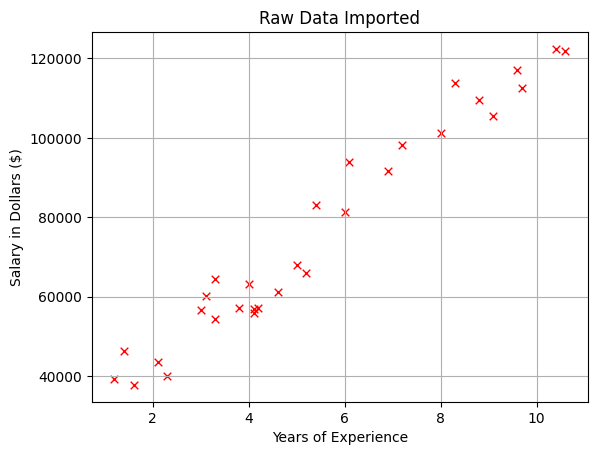

In [19]:
# print('Number of features (n): %.0f'%(n))
print('Number of training examples (m): %.0f'%(m))
print('Number of features (n): %.0f'%(n))


# Create a Scatter Plot of the data by using Matplotlib to see the Data Distribution or Spread
# Creating our X axis as YearsExperience column and Y axis as Salary Column
%matplotlib inline
plt.figure()
plt.scatter(X[:,1], y, s=30, c='r', marker='x', linewidths=1)
plt.xlabel('Years of Experience')  # Corrected label
plt.ylabel('Salary in Dollars ($)')  # Corrected label
plt.title('Raw Data Imported')
plt.grid(True)
plt.show()

In [20]:
def linearRegCostFunction(theta, X, y, lmda):
    m = len(y) # number of training examples
    J = 0
    grad = np.zeros(theta.size)
    theta = theta.reshape( X.shape[1], 1 )
    h = np.dot(X, theta)
    J = (0.5/m) * np.dot( ( h - y ).T, h - y ) + (0.5*lmda/m) * np.sum( np.square(theta[1:]) )
    grad = ((1/m) * (h - y).T.dot( X )).T + (lmda/m) * np.r_[ [[0]], theta[1:] ]
    grad = np.r_[grad.ravel()]
    return (J, grad)

(30, 2) * (2, 1) =? (30,)


ValueError: Data must be 1-dimensional

# Homework 3.2
Continuing from homework 1, use the ‘ext1data.txt’ dataset from Andrew Ng’s Exercise 1 and perform polynomial linear regression using sklearn library with degree 10 under these 3 approaches:

* Without regularization
* With L1 regularization
* With L2 regularization
* With Elastic-Net regularization

See example code from Kaggle
https://www.kaggle.com/code/jonasschroeder/regularization-examples-ridge-lasso-l1-l2

Ext1 Dataset (Exercise 1):
https://github.com/michaelmorr82/Machine-Learning-Coursera-Andrew-Ng/tree/master/Exercises

Submit your .ipynb file to show your work

# Homework 3.3

Follow the Kaggle example below, using the same dataset. Determine the best value of λ to use for
Ridge Regression and Lasso Regression for polynomial regression of degree 10.
• Kaggle code: https://www.kaggle.com/code/jonasschroeder/regularization-examples-ridge-lasso-l1-l2

Submit the Jupyter Notebook .ipynb file to show your work.